In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
data_path = "/content/gdrive/MyDrive/ML/second/lecture1_hw.ipynb"

Mounted at /content/gdrive


In [ ]:

data_path = "/content/gdrive/MyDrive/ML/second/diamonds.csv"
train_df = pd.read_csv(data_path)
print(train_df.head())
# команды для bash пишутся с !
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/name

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  
ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/name': No such file or directory


In [ ]:
!ls /content/gdrive/My\ Drive/Colab\ Notebooks/name

ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/name': No such file or directory


In [2]:
train_df = pd.read_csv('diamonds.csv')

In [4]:
diamonds_df =train_df

In [5]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


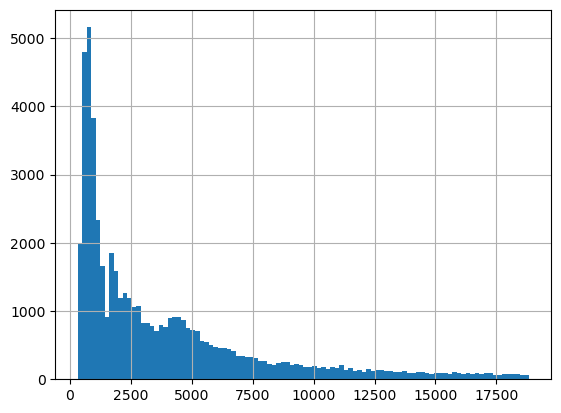

In [6]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [7]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [8]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [9]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [10]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

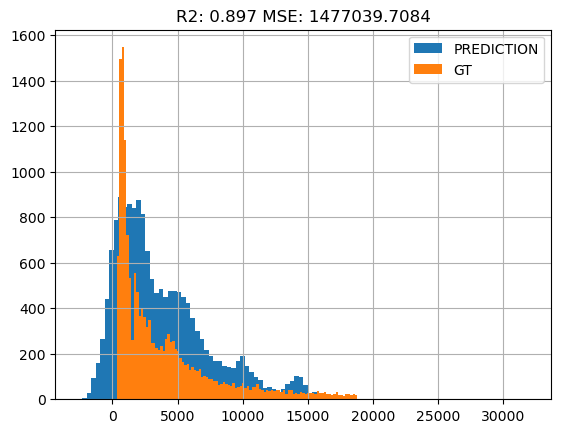

In [16]:
plt.title(f'R2: {str(score)[:5]} MSE: {str(round(mse,4))}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

 ## Для начала реализуем градиентный спуск для линейной модели


In [17]:
X_train
shape = X_train.shape
W = np.ones(shape = shape[1])

In [18]:
batch_size = 50
X_train.shape[0]/batch_size

755.16

In [19]:
y_train.shape

(37758, 1)

In [20]:
class own_linear_regression:
    def __init__(self) -> None:
        self.max_iter = 20
        self.batch_size = 50
        self.alpha = 0.2
        self.W = None

    def train(self, X, y):
        W = np.ones(shape = X_train.shape[1]+1)
        X = np.hstack((np.ones(shape=(X_train.shape[0],1)),X))
        X_split = np.array_split(X,X.shape[0]/self.batch_size)
        y_split = np.array_split(y,X.shape[0]/self.batch_size)
        for batch,ans in zip(X_split,y_split):
            a = batch.dot(W)
            err =a.reshape(-1, 1) - ans
            grad = 2*batch.T.dot(err)/self.batch_size
            grad = grad.flatten()
            W -= self.alpha * grad
        self.W = W

    def predict(self, X):
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
        return X.dot(self.W)


In [21]:
reg = own_linear_regression()
reg.train(X_train,y_train)

In [22]:
y_pred_own = reg.predict(X_test)

In [23]:
own_mse = mean_squared_error(y_pred_own, y_test)
own_score = r2_score(y_pred_own,y_test)


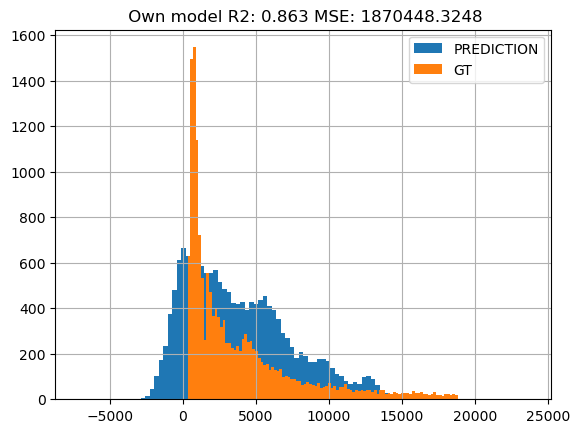

In [24]:
plt.title(f' Own model R2: {str(own_score)[:5]} MSE: {str(round(own_mse,4))}')
plt.hist(y_pred_own.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

# Создаём модель MLP для задачи регрессии

In [25]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
stdsc =StandardScaler()
X_train_s = stdsc.fit_transform(X_train)
X_test_s = stdsc.fit_transform(X_test)

## Попробуем создать двухслойную нейронную сеть

In [28]:
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_sizes=(1500,1500),
        learning_rate=0.001,
        batch_size=150 ,
        epochs = 10 # количество эпох

    ):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.epochs = epochs  # количество эпох
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.W = None

    def sigmoid(self, x):
        # Ограничиваем x
        x = np.clip(x, -500, 500)  # Значения больше 500 будут заменены на 500
        return 1 / (1 + np.exp(-x))
    def sigmoid3(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid2(self, x):
        return np.where(x >= 0,
                        1 / (1 + np.exp(-x)),
                        np.exp(x) / (1 + np.exp(x)))

    def initialize_weights(self,shape):
        return np.random.randn(*shape) * np.sqrt(1.0 / shape[0])

    def train(self, X, y):
        # введем обозначения для размерностей
        N = X.shape[1]+1 #
        k =self.hidden_layer_sizes[0]# число нейронов в первом слое
        k1  =self.hidden_layer_sizes[1] # число нейронов во втором слое
        W1 = self.initialize_weights((N,k))
        W2 = self.initialize_weights((k,k1))
        W3 = self.initialize_weights((k1,1))
        X = np.hstack((np.ones(shape=(X.shape[0],1)),X))


        for _ in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            X_split = np.array_split(X_shuffled,X_shuffled.shape[0]/self.batch_size)
            y_split = np.array_split(y_shuffled,X.shape[0]/self.batch_size)
            for batch,ans in zip(X_split,y_split):
                X1 = batch.dot(W1) # должны получить матрицу  batch_size x k
                Z1 = np.apply_along_axis(self.sigmoid, axis=0, arr=X1)# должны получить матрицу  batch_size x k
                X2 = Z1.dot(W2)# должны получить матрицу  batch_size x k1
                Z2 = np.apply_along_axis(self.sigmoid, axis=0, arr=X2) # X2
                X3 = Z2.dot(W3)  # должны получить матрицу  batch_size x 1
                err = X3- ans

                g3_W3 = 2*Z2.T.dot(err)/self.batch_size # должны получить матрицу   k1 x 1
                g3_Z2 =  (2/self.batch_size)*err.dot(W3.T)#должны получить матрицу  batch_size x k1
                gZ2_X2 = Z2*(1 - Z2)# поэлементно  batch_size x k1
                g2_W2 = Z1.T.dot(gZ2_X2 * g3_Z2) # поэлементно  k x k1
                g2_Z1 = (gZ2_X2 * g3_Z2).dot(W2.T)# поэлементно  batch_size x k
                gZ1_X1 = Z1*(1 - Z1)# поэлементно  batch_size x k
                g1W1 = batch.T.dot(gZ1_X1 * g2_Z1) # поэлементно  batch_size x k
                W3-= self.learning_rate*(g3_W3 + 0.2*W3)
                W2-= self.learning_rate*(g2_W2 + 0.2*W2)
                W1-=self.learning_rate* (g1W1 + 0.3*W1)
            print(f"Epoch: {_}, Loss: {err.T.dot(err)/batch_size}")
        self.W = (W1,W2,W3)


    def predict(self, X):
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
        X1 = X.dot(self.W[0]) # должны получить матрицу  batch_size x k
        Z1 = np.apply_along_axis(self.sigmoid, axis=0, arr=X1)# должны получить матрицу  batch_size x k
        X2 = Z1.dot(self.W[1])# должны получить матрицу  batch_size x k1
        Z2 = np.apply_along_axis(self.sigmoid, axis=0, arr=X2) # X2
        X3 = Z2.dot(self.W[2])  # должны получить матрицу  batch_size x 1
        return X3


In [40]:
reg = MLPRegressor()
reg. train(X_train_s,y_train)

Epoch: 0, Loss: [[2069554.09177472]]
Epoch: 1, Loss: [[4718557.2395654]]
Epoch: 2, Loss: [[3889919.82310323]]
Epoch: 3, Loss: [[3511468.27990624]]
Epoch: 4, Loss: [[3521866.27773137]]
Epoch: 5, Loss: [[3345347.63287695]]
Epoch: 6, Loss: [[4045710.20450832]]
Epoch: 7, Loss: [[15924805.56790737]]
Epoch: 8, Loss: [[6149280.06019016]]
Epoch: 9, Loss: [[7668038.24514383]]


4049906  4665935  2854133   12451308

In [30]:
y_nn = reg.predict(X_test_s)
mse_nn = mean_squared_error(y_nn, y_test)
r2_nn = r2_score(y_nn,y_test)

In [32]:
y_nn.max()

18448.226453475265

## Проверяем качество на тестовой выборке

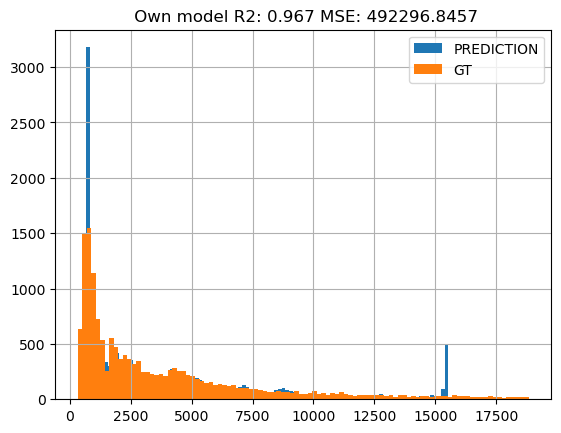

In [41]:
plt.title(f' Own model R2: {str(r2_nn)[:5]} MSE: {str(round(mse_nn,4))}')
plt.hist(y_nn.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()

## Пробуем создать многослойную сеть

In [45]:
class MLPRegressor_n:
    def __init__(
        self,
        n_layers = 2,
        hidden_layer_sizes=(1000,1000),
        learning_rate=0.0001,
        batch_size=100,
        epochs = 10# количество эпох

    ):
        self.n_layers = n_layers
        self.hidden_layer_sizes = 100 * np.ones(n_layers,dtype=int)
        for i in range(len(hidden_layer_sizes)):
            self.hidden_layer_sizes[i] = hidden_layer_sizes[i]
        self.learning_rate = learning_rate
        self.epochs = epochs  # количество эпох
        self.batch_size = batch_size
        self.W = None

    def sigmoid(self, x):
        # Ограничиваем x
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid3(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid2(self, x):
        return np.where(x >= 0,
                        1 / (1 + np.exp(-x)),
                        np.exp(x) / (1 + np.exp(x)))

    def initialize_weights(self,shape):
        return np.random.randn(*shape) * np.sqrt(1.0 / shape[0])

    def train(self, X, y):
        N = X.shape[1]+1 #
        W = []
        W.append(self.initialize_weights((N,self.hidden_layer_sizes[0])))
        for i in range(1,len(self.hidden_layer_sizes)):
            W.append(self.initialize_weights((self.hidden_layer_sizes[i-1],self.hidden_layer_sizes[i])))
        W.append(self.initialize_weights((self.hidden_layer_sizes[-1],1)))# оставляем списком, тк слои могут иметь разную размерность
        X = np.hstack((np.ones(shape=(X.shape[0],1)),X))


        for _ in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            X_split = np.array_split(X_shuffled,X_shuffled.shape[0]/self.batch_size)
            y_split = np.array_split(y_shuffled,X.shape[0]/self.batch_size)


            for batch,ans in zip(X_split,y_split):
                # Прямой проход
                X_i = []
                Z_i = []
                X_i.append(batch.dot(np.array(W[0])))
                Z_i.append(np.apply_along_axis(self.sigmoid, axis=0, arr=X_i[0]))
                for w in W[1:-1]:
                    X_i.append(Z_i[-1].dot(w))
                    Z_i.append(np.apply_along_axis(self.sigmoid, axis=0, arr=X_i[-1]))
                X_i.append(Z_i[-1].dot(W[-1]))
                err = X_i[-1]- ans


                # Обратный проход
                g_w =[]
                g_z = []
                g_x = []



                g_w.append(2*Z_i[-1].T.dot(err)/self.batch_size)
                W[-1]-= self.learning_rate*(g_w[-1] + 0.1*W[-1])
                g_z.append((2/self.batch_size)*err.dot(W[-1].T))

                for i in range(len(W)-2,0,-1):
                    g_w.append(Z_i[i-1].T.dot(Z_i[i]*(1 - Z_i[i]) * g_z[-1]))
                    W[i]-= self.learning_rate*(g_w[-1] + 0.1*W[i])
                    g_z.append((Z_i[i]*(1 - Z_i[i]) * g_z[-1]).dot(W[i].T))
                g_w.append(batch.T.dot(Z_i[0]*(1 - Z_i[0]) * g_z[-1]))
                W[0] -= self.learning_rate*(g_w[-1] + 0.1*W[0])
            print(f"Epoch: {_}, Loss: {err.T.dot(err)/batch_size}")
        self.W = W


    def predict(self, X):
        X = np.hstack((np.ones(shape=(X.shape[0], 1)), X))
        X1=None
        Z1 = None
        X1 = X.dot(self.W[0])
        for w in self.W[1:]:
            Z1 = np.apply_along_axis(self.sigmoid, axis=0, arr=X1)# должны получить матрицу  batch_size x k
            X1 = Z1.dot(w)
        return X1

In [46]:
reg = MLPRegressor_n()

In [47]:
reg.train(X_train_s,y_train)

Epoch: 0, Loss: [[1606306.56294606]]
Epoch: 1, Loss: [[1816297.0468782]]
Epoch: 2, Loss: [[1773483.75600184]]
Epoch: 3, Loss: [[326168.41197381]]
Epoch: 4, Loss: [[1321156.36178705]]
Epoch: 5, Loss: [[1081547.4781876]]
Epoch: 6, Loss: [[712752.44422268]]
Epoch: 7, Loss: [[979116.69471184]]
Epoch: 8, Loss: [[810929.26981383]]
Epoch: 9, Loss: [[570314.12001667]]


In [48]:
y_nn = reg.predict(X_test_s)
mse_nn = mean_squared_error(y_nn, y_test)
r2_nn = r2_score(y_nn,y_test)

In [38]:
y_nn.max()

15519.982644721327

## Проверяем качество на тестовой выборке

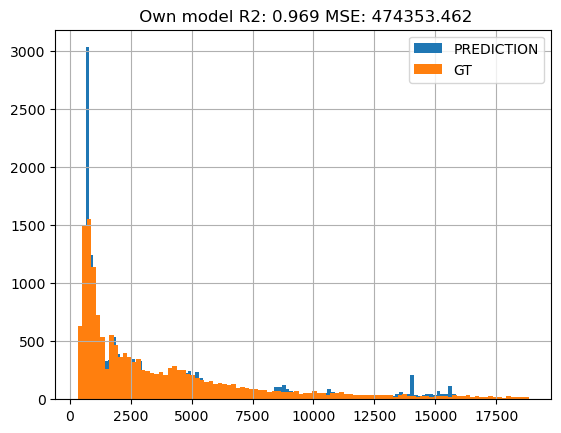

In [49]:
plt.title(f' Own model R2: {str(r2_nn)[:5]} MSE: {str(round(mse_nn,4))}')
plt.hist(y_nn.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid()